# UAS PPW

Crawling Data
Tujuan dari proses crawling dalam konteks web adalah untuk mengumpulkan informasi secara sistematis dari berbagai situs web di seluruh internet.

In [4]:
import requests
from bs4 import BeautifulSoup

In [5]:
url = "https://www.antaranews.com/" #menentukan url

In [6]:
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
first_page = soup.findAll('li',"dropdown mega-full menu-color1")

save_categori = []
for links in first_page:
  categori = links.find('a').get('href')
  save_categori.append(categori)
save_categori

['https://www.antaranews.com/',
 'https://www.antaranews.com/politik',
 'https://www.antaranews.com/hukum',
 'https://www.antaranews.com/ekonomi',
 'https://www.antaranews.com/metro',
 'https://www.antaranews.com/sepakbola',
 'https://www.antaranews.com/olahraga',
 'https://www.antaranews.com/humaniora',
 'https://www.antaranews.com/lifestyle',
 'https://www.antaranews.com/hiburan',
 'https://www.antaranews.com/dunia',
 'https://en.antaranews.com']

In [7]:
categori_search = [save_categori[5],save_categori[6],save_categori[9]]
categori_search

['https://www.antaranews.com/sepakbola',
 'https://www.antaranews.com/olahraga',
 'https://www.antaranews.com/hiburan']

In [8]:
datas=[]

for ipages in range(1,25):
  for beritas in categori_search:
    # print(beritas)
    response_berita = requests.get(beritas+"/"+str(ipages))
    namecategori = beritas.split("/")
    soup_berita = BeautifulSoup(response_berita.text, 'html.parser')
    pages_berita = soup_berita.findAll('article', {'class' :'simple-post simple-big clearfix'})

    i = 0
    for items in pages_berita:
      i += 1
      get_link_in = items.find("a").get("href")
      response_artikel = requests.get(get_link_in)
      soup_artikel = BeautifulSoup(response_artikel.text, 'html.parser')

      cek_judul = soup_artikel.findAll("h1","post-title")
      if cek_judul:
        judul = soup_artikel.find("h1","post-title").text
      else:
        judul=""

      label = namecategori[-1]

      try:
        date = soup_artikel.find("span", "article-date").text
      except AttributeError:
          date = "Data tanggal tidak ditemukan"
      cek_baca_juga = soup_artikel.findAll("span","baca-juga")
      trash1 = ""
      if cek_baca_juga:
        for bacas in cek_baca_juga:
          text_trash = bacas.text
          trash1 += text_trash + ' '
      else:
        trash1 = ""

      artikels = soup_artikel.find_all('div', {'class' :'post-content clearfix'})
      if artikels:
        artikel_content = soup_artikel.find('div', {'class' :'post-content clearfix'}).text
        artikel = artikel_content.replace("\n"," ").replace("\t"," ").replace("\r"," ").replace(trash1,"").replace("\xa0","")
      else:
        artikel = ""
      cek_author = soup_artikel.findAll("p","text-muted small mt10")
      if cek_author:
        author = soup_artikel.find("p","text-muted small mt10").text.replace("\t\t"," ")
      else:
        author = ""
      datas.append({
      'Tanggal' : date,
      'Penulis':author,
      'Judul': judul,
      'Artikel': artikel,
      'Label' :  label
          })


In [9]:
len(datas)

1080

In [10]:
# Menyimpan data dalam bentuk CSV
import csv
csv_filename = '/content/drive/MyDrive/PencarianPenambanganWeb/tugas/data_antaranews.csv'
with open(csv_filename, 'w', newline='', encoding='utf-8') as csv_file:
    fieldnames = ['Tanggal', 'Penulis', 'Judul', 'Artikel', 'Label']
    csv_writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    csv_writer.writeheader()

    for entry in datas:
        csv_writer.writerow(entry)

print(f"Data telah disimpan dalam file {csv_filename}")

Data telah disimpan dalam file /content/drive/MyDrive/PencarianPenambanganWeb/tugas/data_antaranews.csv


In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("/content/drive/MyDrive/PencarianPenambanganWeb/tugas/data_antaranews.csv")
data

,Tanggal,Penulis,Judul,Artikel,Label
0,"Senin, 11 Desember 2023 07:14 WIB",Pewarta: A Rauf Andar AdipatiEditor: Teguh Han...,Roma imbang dengan Fiorentina pada laga yang d...,Jakarta (ANTARA) - AS Roma bermain imbang...,sepakbola
1,"Senin, 11 Desember 2023 06:54 WIB",Pewarta: A Rauf Andar AdipatiEditor: Teguh Han...,Girona rebut puncak klasemen setelah tundukkan...,Jakarta (ANTARA) - Girona merebut puncak ...,sepakbola
2,"Senin, 11 Desember 2023 03:50 WIB",Pewarta: Aldi SultanEditor: Sambas COPYRIGHT ...,Persita Tangerang jauhi zona degradasi seusai ...,Persita Tangerang menempati posisi ke-13 klas...,sepakbola
3,"Senin, 11 Desember 2023 03:48 WIB",Pewarta: A Rauf Andar AdipatiEditor: Sambas C...,Tottenham akhiri rentetan hasil buruk dengan k...,Kemenangan yang mengakhiri rentetan empat kek...,sepakbola
4,"Senin, 11 Desember 2023 00:32 WIB",Pewarta: A Rauf Andar AdipatiEditor: Sambas C...,Leverkusen perpanjang dominasi di puncak klase...,Leverkusen kini berada di puncak dengan kolek...,sepakbola
...,...,...,...,...,...
1075,"Rabu, 15 November 2023 15:37 WIB",Penerjemah: Ahmad Faishal AdnanEditor: Maria R...,YG Entertainment ungkap negosiasi kontrak BLAC...,Jakarta (ANTARA) - Label K-pop YG Enterta...,hiburan
1076,"Rabu, 15 November 2023 13:00 WIB",Penerjemah: Vinny Shoffa SalmaEditor: Siti Zul...,Suara Edith Piaf akan dibuat ulang dengan AI u...,Jakarta (ANTARA) - Penyanyi legendaris as...,hiburan
1077,"Rabu, 15 November 2023 12:44 WIB",Pewarta: Lia Wanadriani SantosaEditor: Maria R...,"Selain ""Twinkling Watermelon"", ini empat drako...",Jakarta (ANTARA) - Tercatat sudah lebih d...,hiburan
1078,"Rabu, 15 November 2023 12:25 WIB",Pewarta: Pamela SakinaEditor: Siti Zulaikha C...,Perhatikan hal penting ini sebelum nonton kons...,Jakarta (ANTARA) - Konser perdana Coldpla...,hiburan


In [3]:
data.isna().sum()

Tanggal      0
Penulis    158
Judul        0
Artikel     77
Label        0
dtype: int64

In [4]:
data = data.dropna()
data

,Tanggal,Penulis,Judul,Artikel,Label
0,"Senin, 11 Desember 2023 07:14 WIB",Pewarta: A Rauf Andar AdipatiEditor: Teguh Han...,Roma imbang dengan Fiorentina pada laga yang d...,Jakarta (ANTARA) - AS Roma bermain imbang...,sepakbola
1,"Senin, 11 Desember 2023 06:54 WIB",Pewarta: A Rauf Andar AdipatiEditor: Teguh Han...,Girona rebut puncak klasemen setelah tundukkan...,Jakarta (ANTARA) - Girona merebut puncak ...,sepakbola
2,"Senin, 11 Desember 2023 03:50 WIB",Pewarta: Aldi SultanEditor: Sambas COPYRIGHT ...,Persita Tangerang jauhi zona degradasi seusai ...,Persita Tangerang menempati posisi ke-13 klas...,sepakbola
3,"Senin, 11 Desember 2023 03:48 WIB",Pewarta: A Rauf Andar AdipatiEditor: Sambas C...,Tottenham akhiri rentetan hasil buruk dengan k...,Kemenangan yang mengakhiri rentetan empat kek...,sepakbola
4,"Senin, 11 Desember 2023 00:32 WIB",Pewarta: A Rauf Andar AdipatiEditor: Sambas C...,Leverkusen perpanjang dominasi di puncak klase...,Leverkusen kini berada di puncak dengan kolek...,sepakbola
...,...,...,...,...,...
1075,"Rabu, 15 November 2023 15:37 WIB",Penerjemah: Ahmad Faishal AdnanEditor: Maria R...,YG Entertainment ungkap negosiasi kontrak BLAC...,Jakarta (ANTARA) - Label K-pop YG Enterta...,hiburan
1076,"Rabu, 15 November 2023 13:00 WIB",Penerjemah: Vinny Shoffa SalmaEditor: Siti Zul...,Suara Edith Piaf akan dibuat ulang dengan AI u...,Jakarta (ANTARA) - Penyanyi legendaris as...,hiburan
1077,"Rabu, 15 November 2023 12:44 WIB",Pewarta: Lia Wanadriani SantosaEditor: Maria R...,"Selain ""Twinkling Watermelon"", ini empat drako...",Jakarta (ANTARA) - Tercatat sudah lebih d...,hiburan
1078,"Rabu, 15 November 2023 12:25 WIB",Pewarta: Pamela SakinaEditor: Siti Zulaikha C...,Perhatikan hal penting ini sebelum nonton kons...,Jakarta (ANTARA) - Konser perdana Coldpla...,hiburan


In [ ]:
### Cek Jumlah Class Data

In [5]:
import pandas as pd

import numpy as np


In [6]:
data['Label'].value_counts()

hiburan      324
olahraga     310
sepakbola    288
Name: Label, dtype: int64

### Grafik data Class

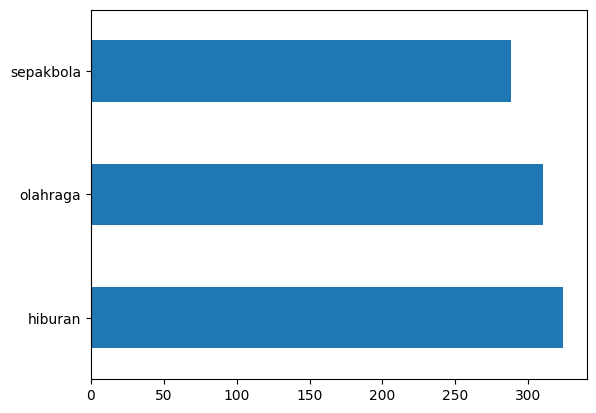

In [7]:
import matplotlib.pyplot as plt

# df['Kelas'].value_counts().plot(kind='barh')
data['Label'].value_counts().plot(kind='barh')
plt.show()

## Cleaning Text

Tujuan dari proses pembersihan teks atau cleaning text adalah untuk meningkatkan kualitas dan keterbacaan data teks. Dalam analisis data dan pemrosesan bahasa alami, pembersihan teks melibatkan langkah-langkah seperti menghapus karakter khusus, mengoreksi kesalahan ejaan, mengonversi teks menjadi format standar, dan menghilangkan unsur-unsur yang tidak relevan atau mengganggu, seperti tautan atau tag HTML

In [8]:
import re, string

# Text Cleaning
def cleaning(text):
    # HTML Tag Removal
    text = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});').sub('', str(text))

    # Case folding
    text = text.lower()

    # Trim text
    text = text.strip()

    # Remove punctuations, karakter spesial, and spasi ganda
    text = re.compile('<.*?>').sub('', text)
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub('\s+', ' ', text)

    # Number removal
    text = re.sub(r'\[[0-9]*\]', ' ', text)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d', ' ', text)
    text = re.sub(r'\s+', ' ', text)

    # Mengubah text 'nan' dengan whitespace agar nantinya dapat dihapus
    text = re.sub('nan', '', text)

    return text

In [9]:
data['Judul'] = data['Judul'].apply(lambda x: cleaning(x))
data['Artikel'] = data['Artikel'].apply(lambda x: cleaning(x))

data.head()

<ipython-input-9-63ed4ebf5270>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Judul'] = data['Judul'].apply(lambda x: cleaning(x))
<ipython-input-9-63ed4ebf5270>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Artikel'] = data['Artikel'].apply(lambda x: cleaning(x))


,Tanggal,Penulis,Judul,Artikel,Label
0,"Senin, 11 Desember 2023 07:14 WIB",Pewarta: A Rauf Andar AdipatiEditor: Teguh Han...,roma imbang dengan fiorentina pada laga yang d...,jakarta antara as roma bermain imbang dengan t...,sepakbola
1,"Senin, 11 Desember 2023 06:54 WIB",Pewarta: A Rauf Andar AdipatiEditor: Teguh Han...,girona rebut puncak klasemen setelah tundukkan...,jakarta antara girona merebut puncak klasemen ...,sepakbola
2,"Senin, 11 Desember 2023 03:50 WIB",Pewarta: Aldi SultanEditor: Sambas COPYRIGHT ...,persita tangerang jauhi zona degradasi seusai ...,persita tangerang menempati posisi ke klasemen...,sepakbola
3,"Senin, 11 Desember 2023 03:48 WIB",Pewarta: A Rauf Andar AdipatiEditor: Sambas C...,tottenham akhiri rentetan hasil buruk dengan k...,kemegan yang mengakhiri rentetan empat kekalah...,sepakbola
4,"Senin, 11 Desember 2023 00:32 WIB",Pewarta: A Rauf Andar AdipatiEditor: Sambas C...,leverkusen perpanjang dominasi di puncak klase...,leverkusen kini berada di puncak dengan koleks...,sepakbola


### Export Data Cleaning

In [10]:
# Checkpoint: Export Hasil Text Cleaning
data.to_csv('AntaraCleaning.csv')

### Menghapus Missing Value
Tujuan utama dari menghapus nilai yang hilang atau missing value dalam analisis data adalah untuk memastikan integritas dan kehandalan dataset

In [11]:
data = data.replace('', np.nan)

In [12]:
# Cek missing values
data.isnull().sum()

Tanggal    0
Penulis    0
Judul      0
Artikel    0
Label      0
dtype: int64

In [13]:
# Remove missing values
data.dropna(inplace=True)
len(data)

922

## Tokenisasi
Tokenisasi sebenarnya merupakan sebuah proses pemisahan atau pengelompokan teks menjadi unit-unit yang lebih kecil yang disebut sebagai "token". Tokenisasi sering kali diterapkan sebagai langkah awal dalam pemrosesan bahasa alami, analisis teks, atau pengolahan data teks lainnya.

In [14]:
import nltk
from nltk.tokenize import word_tokenize
# nltk.download('punkt')
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

### Tokenisasi Judul

In [15]:
# Tokenizing Judul
data['judul_tokens'] = data['Judul'].apply(lambda x: word_tokenize(x))
data[["Judul", "judul_tokens"]].head()

,Judul,judul_tokens
0,roma imbang dengan fiorentina pada laga yang d...,"[roma, imbang, dengan, fiorentina, pada, laga,..."
1,girona rebut puncak klasemen setelah tundukkan...,"[girona, rebut, puncak, klasemen, setelah, tun..."
2,persita tangerang jauhi zona degradasi seusai ...,"[persita, tangerang, jauhi, zona, degradasi, s..."
3,tottenham akhiri rentetan hasil buruk dengan k...,"[tottenham, akhiri, rentetan, hasil, buruk, de..."
4,leverkusen perpanjang dominasi di puncak klase...,"[leverkusen, perpanjang, dominasi, di, puncak,..."


### Tokenisasi Artikel

In [16]:
# Tokenizing Abstrak
data['artikel_tokens'] = data['Artikel'].apply(lambda x: word_tokenize(x))
data[["Artikel", "artikel_tokens"]].head()

,Artikel,artikel_tokens
0,jakarta antara as roma bermain imbang dengan t...,"[jakarta, antara, as, roma, bermain, imbang, d..."
1,jakarta antara girona merebut puncak klasemen ...,"[jakarta, antara, girona, merebut, puncak, kla..."
2,persita tangerang menempati posisi ke klasemen...,"[persita, tangerang, menempati, posisi, ke, kl..."
3,kemegan yang mengakhiri rentetan empat kekalah...,"[kemegan, yang, mengakhiri, rentetan, empat, k..."
4,leverkusen kini berada di puncak dengan koleks...,"[leverkusen, kini, berada, di, puncak, dengan,..."


## Menghapus Stop Word
Stopwords adalah kata-kata umum yang sering muncul dalam suatu bahasa dan cenderung tidak memberikan nilai informasi yang tinggi, seperti "dan," "atau," "yang," dan sebagainya.

In [17]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
from nltk.corpus import stopwords
from itertools import chain

stop_words = set(chain(stopwords.words('indonesian'), stopwords.words('english')))

data['judul_tokens'] = data['judul_tokens'].apply(lambda x: [w for w in x if not w in stop_words])
data['artikel_tokens'] = data['artikel_tokens'].apply(lambda x: [w for w in x if not w in stop_words])

### Stop Word Abstrak

In [21]:
data[["Artikel", "artikel_tokens"]].head()

,Artikel,artikel_tokens
0,jakarta antara as roma bermain imbang dengan t...,"[jakarta, roma, bermain, imbang, tamunya, fior..."
1,jakarta antara girona merebut puncak klasemen ...,"[jakarta, girona, merebut, puncak, klasemen, l..."
2,persita tangerang menempati posisi ke klasemen...,"[persita, tangerang, menempati, posisi, klasem..."
3,kemegan yang mengakhiri rentetan empat kekalah...,"[kemegan, rentetan, kekalahan, hasil, imbang, ..."
4,leverkusen kini berada di puncak dengan koleks...,"[leverkusen, puncak, koleksi, poin, unggul, po..."


## Stemming
Tujuan dari proses stemming dalam pemrosesan bahasa alami adalah untuk menyederhanakan kata-kata ke bentuk dasar atau akar (root) mereka.

In [22]:
!pip install sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.2 MB/s eta 0:00:00


In [23]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from tqdm.auto import tqdm
tqdm.pandas()

factory = StemmerFactory()
stemmer = factory.create_stemmer()

#### Stemming Artikel

In [34]:
# Stemming artikel
data['artikel_tokens'] = data['artikel_tokens'].progress_apply(lambda x: stemmer.stem(' '.join(x)).split(' '))

  0%|          | 0/922 [00:00<?, ?it/s]

In [24]:
data[["Artikel", "artikel_tokens"]].head()

,Artikel,artikel_tokens
0,jakarta antara as roma bermain imbang dengan t...,"[jakarta, roma, bermain, imbang, tamunya, fior..."
1,jakarta antara girona merebut puncak klasemen ...,"[jakarta, girona, merebut, puncak, klasemen, l..."
2,persita tangerang menempati posisi ke klasemen...,"[persita, tangerang, menempati, posisi, klasem..."
3,kemegan yang mengakhiri rentetan empat kekalah...,"[kemegan, rentetan, kekalahan, hasil, imbang, ..."
4,leverkusen kini berada di puncak dengan koleks...,"[leverkusen, puncak, koleksi, poin, unggul, po..."


In [19]:
data['artikel_tokens'] = data['artikel_tokens'].apply(lambda x: ' '.join(x))

data.to_csv('DataOlah_Antara.csv')

In [20]:
dataOlah = pd.read_csv('/content/DataOlah_Antara.csv')
dataOlah.head()

,Unnamed: 0,Tanggal,Penulis,Judul,Artikel,Label,judul_tokens,artikel_tokens
0,0,"Senin, 11 Desember 2023 07:14 WIB",Pewarta: A Rauf Andar AdipatiEditor: Teguh Han...,roma imbang dengan fiorentina pada laga yang d...,jakarta antara as roma bermain imbang dengan t...,sepakbola,"['roma', 'imbang', 'fiorentina', 'laga', 'dihi...",jakarta roma bermain imbang tamunya fiorentina...
1,1,"Senin, 11 Desember 2023 06:54 WIB",Pewarta: A Rauf Andar AdipatiEditor: Teguh Han...,girona rebut puncak klasemen setelah tundukkan...,jakarta antara girona merebut puncak klasemen ...,sepakbola,"['girona', 'rebut', 'puncak', 'klasemen', 'tun...",jakarta girona merebut puncak klasemen liga sp...
2,2,"Senin, 11 Desember 2023 03:50 WIB",Pewarta: Aldi SultanEditor: Sambas COPYRIGHT ...,persita tangerang jauhi zona degradasi seusai ...,persita tangerang menempati posisi ke klasemen...,sepakbola,"['persita', 'tangerang', 'jauhi', 'zona', 'deg...",persita tangerang menempati posisi klasemen ra...
3,3,"Senin, 11 Desember 2023 03:48 WIB",Pewarta: A Rauf Andar AdipatiEditor: Sambas C...,tottenham akhiri rentetan hasil buruk dengan k...,kemegan yang mengakhiri rentetan empat kekalah...,sepakbola,"['tottenham', 'rentetan', 'hasil', 'buruk', 'k...",kemegan rentetan kekalahan hasil imbang membaw...
4,4,"Senin, 11 Desember 2023 00:32 WIB",Pewarta: A Rauf Andar AdipatiEditor: Sambas C...,leverkusen perpanjang dominasi di puncak klase...,leverkusen kini berada di puncak dengan koleks...,sepakbola,"['leverkusen', 'perpanjang', 'dominasi', 'punc...",leverkusen puncak koleksi poin unggul poin tim...


# TF-IDF
Tujuan dari metode TF-IDF (Term Frequency-Inverse Document Frequency) adalah untuk memberikan bobot pada kata-kata dalam suatu dokumen berdasarkan seberapa pentingnya kata tersebut terhadap dokumen tersebut dan terhadap koleksi dokumen secara keseluruhan.

In [21]:
from sklearn.model_selection import train_test_split

X = dataOlah['artikel_tokens']
y = dataOlah['Label']

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_tfidf = vectorizer.fit_transform(X)
# X_test_tfidf = vectorizer.transform(X_test)

terms = vectorizer.get_feature_names_out()
df_tfidfvect = pd.DataFrame(data = X_tfidf.toarray(),columns = terms)
df_tfidfvect

,aaa,aac,aah,aaron,abaca,abad,abadi,abaka,abbad,abbey,...,여러분들의,연말결산,유노윤호,일반예매,정국,지금,지니,최강창민,최애곡도,팬클럽
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
918,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
919,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
920,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
X_tfidf.shape

(922, 20518)

### Implementasi
Tujuan dari implementasi modeling dalam konteks analisis data atau machine learning adalah untuk menerapkan suatu model atau algoritma yang dapat memberikan solusi atau prediksi yang bermanfaat terhadap suatu permasalahan atau pertanyaan yang spesifik.

In [24]:
import pandas as pd

# Load the preprocessed data
data = pd.read_csv('DataOlah_Antara.csv')

# Drop any rows with missing values
data.dropna(inplace=True)

# Separate features (X) and labels (y)
X = data['artikel_tokens']
y = data['Label']


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = vectorizer.transform(X_test)


In [27]:
import pickle

In [28]:
with open('tfidf_vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Print the overall metrics
print('Accuracy score : ', accuracy_score(y_test, predictions_bayes))
print('Precision score : ', precision_score(y_test, predictions_bayes, average='weighted'))
print('Recall score : ', recall_score(y_test, predictions_bayes, average='weighted'))
print('F1 score : ', f1_score(y_test, predictions_bayes, average='weighted'))

Accuracy: 0.99

Classification Report:
              precision    recall  f1-score   support

     hiburan       1.00      1.00      1.00        68
    olahraga       1.00      0.98      0.99        58
   sepakbola       0.98      1.00      0.99        59

    accuracy                           0.99       185
   macro avg       0.99      0.99      0.99       185
weighted avg       0.99      0.99      0.99       185


Confusion Matrix:
[[68  0  0]
 [ 0 57  1]
 [ 0  0 59]]
